In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools_Leandro import *
from omegaconf import OmegaConf
from models._main import get_model
from models._utils import print_parameters

sns.set_style("whitegrid")

CUDA device found.


# Color and Marker code

*Returns the legend code that is used across all plots.*

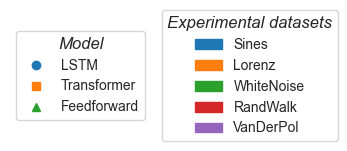

In [3]:
leg_code = legend_code()

In [4]:
legend_code = leg_code

# Model Parameters

In [5]:
model_config = OmegaConf.load("../../configs/submodule/model.yaml")

model_config.model.use_this_pretrained_model = None
model = get_model(model_config.model)
print_parameters(model, verbose=True)

+-----------------------------+------------+-----------+
|            Module           | Parameters | Trainable |
+-----------------------------+------------+-----------+
|    input_hidden.0.weight    |   154624   |    True   |
|     input_hidden.0.bias     |    512     |    True   |
|    input_hidden.2.weight    |    512     |    True   |
|     input_hidden.2.bias     |    512     |    True   |
| hidden_hidden.ffwd.0.weight |   262144   |    True   |
|  hidden_hidden.ffwd.0.bias  |    512     |    True   |
|        linear.weight        |   154624   |    True   |
|         linear.bias         |    302     |    True   |
+-----------------------------+------------+-----------+
Total Parameters: 573742
Total Trainable Parameters: 573742


(573742, 573742)

# Dataset information

*Plot information from datasets. I'm loading information from datasets that used all available worms and neurons in the analysis (in this case, the data scaling experiment datasets, that used the maximum amount of data)*

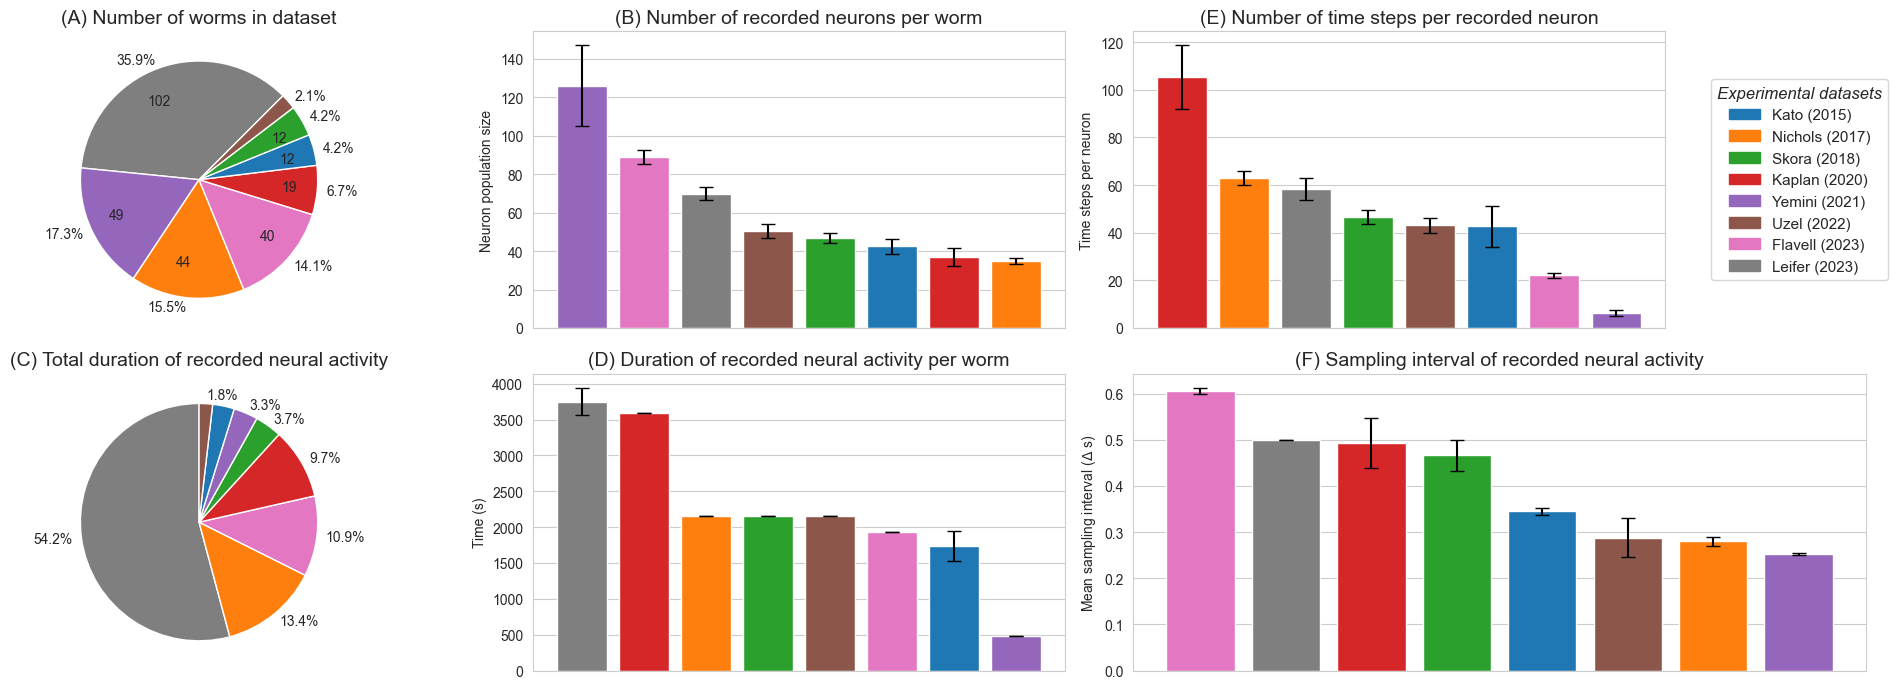

In [6]:
fig1_path_dict = {
    "train_dataset_info": "/home/lrvnc/Projects/worm-graph/logs/results/all_dataset/train_dataset_info.csv",  # Path to train dataset info => extract number of train time steps
    "val_dataset_info": "/home/lrvnc/Projects/worm-graph/logs/results/all_dataset/val_dataset_info.csv",  # Path to val. dataset info => extract number of val. time steps
    "combined_dataset_info": "/home/lrvnc/Projects/worm-graph/logs/results/all_dataset/combined_dataset_info.csv",  # Path to combined dataset info => extract total number of worms and time step interval
}

# NOTE: Error bars on bar plots show +/- 2 SEM
dataset_info = dataset_information(path_dict=fig1_path_dict, legend_code=leg_code)

# Data scaling

*Data scaling plot. To generate the dataframe with the relevant results, firstly for each model you want to plot, you need to furnish the paths for each trial. Then you can call the plot function to obtain a graphic with mean and standard deviation bars. You need to provide the legend code for color standardization.*

In [137]:
# TODO: Do experiments, for each model architecture, by varying the sizes of subsets of the combined datasets.
# Each subset will have a distribution of timesteps per neuron (i.e. each worm has a timestep per neuron metric).
# For each subset, repeat the train pipeline n times (here you did n=3) and save the validation loss each time.
nts_experiments = {
    "LSTM": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_3/2023_11_20_23_26_21",  # LSTM trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_4/2023_11_21_14_02_12",
    ],
    "Transformer": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_3/2023_11_20_23_25_39",  # Transformer trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_4/2023_11_21_14_03_08",
    ],
    "Linear": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_3/2023_11_20_23_26_49",  # Linear trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_4/2023_11_21_14_01_22",
    ],
}

data_results = data_scaling_df(
    nts_experiments
)  # Retrieve the relevant results for the data scaling (and hidden scaling) plot
data_results  # Took ~1s in my computer (small experiments)

,expID,model,model_hidden_size,num_time_steps,time_steps_per_neuron,mean_time_steps_per_neuron,num_worms,time_steps_per_worm,num_params,min_val_loss,val_baseline
0,exp0,NetworkLSTM,232,1796,0 0.734568 1 0.815068 2 13.475000 3...,8.040998,5,359.200000,573574,0.528295,0.010482
1,exp1,NetworkLSTM,232,7088,0 9.293103 1 22.098361 2 4.897959 3...,14.230302,10,708.800000,573574,0.391508,0.010482
2,exp10,NetworkLSTM,232,35499,0 13.475000 1 9.981481 2 19.70833...,13.033561,55,645.436364,573574,0.105739,0.010482
3,exp11,NetworkLSTM,232,39973,0 13.475000 1 8.159091 2 11.22916...,12.929863,60,666.216667,573574,0.079149,0.010482
4,exp12,NetworkLSTM,232,39453,0 8.159091 1 9.702703 2 15.40000...,11.294438,65,606.969231,573574,0.072511,0.010482
...,...,...,...,...,...,...,...,...,...,...,...
331,exp55,LinearNN,512,172537,0 7.977778 1 8.159091 2 9.70...,11.710814,279,618.412186,573742,0.020725,0.010482
332,exp6,LinearNN,512,22611,0 10.568627 1 0.782895 2 34.57692...,12.226418,35,646.028571,573742,0.197455,0.010482
333,exp7,LinearNN,512,26638,0 23.166667 1 0.782895 2 7.03921...,11.282986,40,665.950000,573742,0.161375,0.010482
334,exp8,LinearNN,512,28570,0 9.293103 1 0.782895 2 7.03921...,10.900774,45,634.888889,573742,0.126089,0.010482


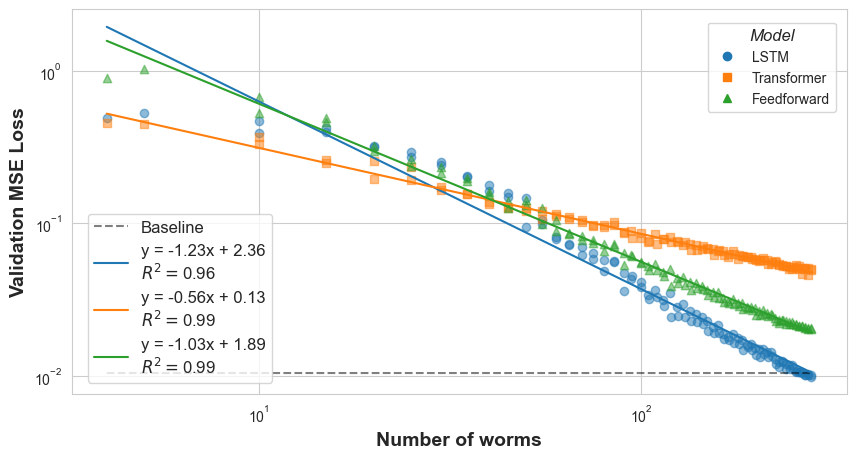

In [139]:
data_scaling_plot(data_results, legend_code=leg_code)

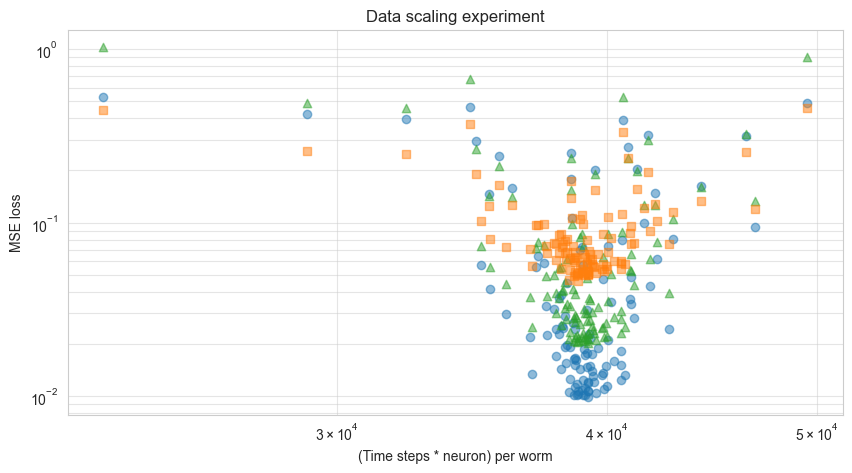

In [151]:
models = ["NetworkLSTM", "LinearNN", "NeuralTransformer"]

model_marker_code = legend_code["model_marker_code"]
model_color_code = legend_code["model_color_code"]
marker_legend = legend_code["marker_legend"]
model_labels = legend_code["model_labels"]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_xscale("log")
ax.set_yscale("log")

for model in models:
    all_values = []
    mse_loss_extended = []
    model_result_subset = data_results[data_results["model"] == model]
    for row in model_result_subset[
        ["time_steps_per_neuron", "min_val_loss"]
    ].iterrows():
        all_values.extend([row[1][0].mean()])
        mse_loss_extended.extend([row[1][1]])

    ax.scatter(
        all_values,
        mse_loss_extended,
        marker=model_marker_code[model_labels[model]],
        color=model_color_code[model_labels[model]],
        alpha=0.5,
    )

ax.set_xlabel("(Time steps * neuron) per worm")
ax.set_ylabel("MSE loss")
ax.set_title("Data scaling experiment")
ax.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

# Hidden Scaling

*Hidden dimension scaling plot. To generate the dataframe with the relevant results, firstly for each model you want to plot, you need to furnish the paths for each trial (it can take some minutes). Then you can call the plot function to obtain a graphic with mean and standard deviation bars. You can chose the degree of the polynomial fit used. You need to provide the legend code for color standardization.*

In [134]:
# Instead of plotting against the hidden size, plot against the number of parameters.
# The hidden size is still the variable that we will vary, but it is simply a way to change the number of parameters.

hidden_experiments = {
    "LSTM": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_parameters/experimental/seed_0/2023_11_21_23_10_55",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_parameters/experimental/seed_1/2023_11_23_00_02_00",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_parameters/experimental/seed_2/2023_11_22_19_11_43",
    ],
    "Transformer": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_parameters/experimental/seed_0/2023_11_21_23_11_25",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_parameters/experimental/seed_1/2023_11_23_00_02_30",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_parameters/experimental/seed_2/2023_11_22_19_12_04",
    ],
    "Linear": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_parameters/experimental/seed_0/2023_11_21_23_10_10",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_parameters/experimental/seed_1/2023_11_23_00_00_58",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_parameters/experimental/seed_2/2023_11_22_19_11_27",
    ],
}

hidden_results = data_scaling_df(
    hidden_experiments
)  # Retrieve the relevant results for the hidden scaling (and data scaling) plot
hidden_results  # Took ~4min in my computer (big experiments)

,expID,model,model_hidden_size,num_time_steps,time_steps_per_neuron,mean_time_steps_per_neuron,num_worms,time_steps_per_worm,num_params,min_val_loss,val_baseline
0,exp0,NetworkLSTM,64,176402,0 7.977778 1 8.159091 2 9.70...,11.697156,284,621.133803,72430,0.135596,0.010482
1,exp1,NetworkLSTM,128,176402,0 7.977778 1 8.159091 2 9.70...,11.697156,284,621.133803,210094,0.040010,0.010482
2,exp10,NetworkLSTM,704,176402,0 7.977778 1 8.159091 2 9.70...,11.697156,284,621.133803,4398190,0.024703,0.010482
3,exp11,NetworkLSTM,768,176402,0 7.977778 1 8.159091 2 9.70...,11.697156,284,621.133803,5191214,0.027446,0.010482
4,exp12,NetworkLSTM,832,176402,0 7.977778 1 8.159091 2 9.70...,11.697156,284,621.133803,6049774,0.030288,0.010482
...,...,...,...,...,...,...,...,...,...,...,...
200,exp5,LinearNN,104,176402,0 7.977778 1 8.159091 2 9.70...,11.697156,284,621.133803,74350,0.065048,0.010482
201,exp6,LinearNN,112,176402,0 7.977778 1 8.159091 2 9.70...,11.697156,284,621.133803,80942,0.055764,0.010482
202,exp7,LinearNN,120,176402,0 7.977778 1 8.159091 2 9.70...,11.697156,284,621.133803,87662,0.047850,0.010482
203,exp8,LinearNN,128,176402,0 7.977778 1 8.159091 2 9.70...,11.697156,284,621.133803,94510,0.041286,0.010482


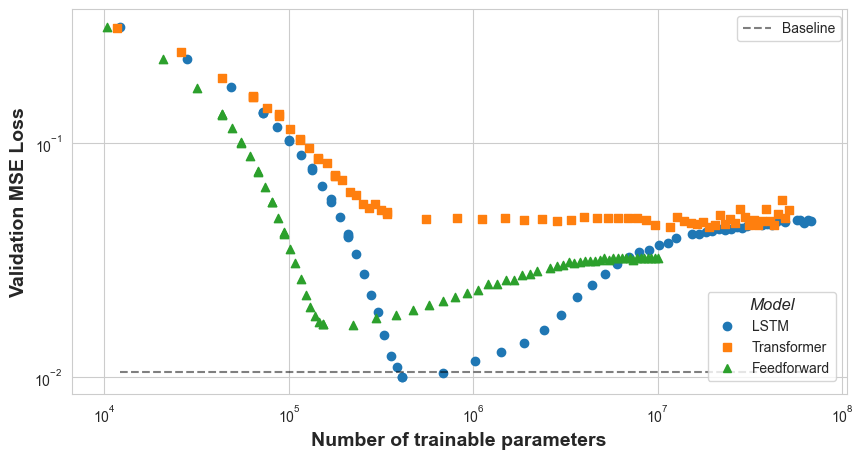

In [136]:
hidden_scaling_plot(hidden_results, legend_code=leg_code, fit_deg=2)

# Data scaling slopes

*Data scaling slopes plot. To generate the dataframe with the relevant results, firstly for each model you want to plot, you need to furnish the paths for each trial (it can take some minutes). Then you can call the plot function to obtain a graphic with mean and standard deviation bars. You need to provide the legend code for color standardization.*

*To create this plot, after a model has been trained (with a given amount of data), we validate it on individual experimental datasets. We then make a plot for each model by experimental dataset.*

In [28]:
nts_experiments = {
    "LSTM": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_3/2023_11_20_23_26_21",  # LSTM trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_4/2023_11_21_14_02_12",
    ],
    "Transformer": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_3/2023_11_20_23_25_39",  # Transformer trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_4/2023_11_21_14_03_08",
    ],
    "Linear": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_3/2023_11_20_23_26_49",  # Linear trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/experimental/seed_4/2023_11_21_14_01_22",
    ],
}

scaling_slope_results = scaling_slopes_df(nts_experiments)  # Took ~10s
scaling_slope_results

,expID,model,validation_dataset,individual_validation_loss,individual_baseline_loss,num_time_steps,num_worms,min_val_loss,val_baseline
0,exp0,NetworkLSTM,Kato2015,0.530292,0.013633,1796,5,0.528295,0.010482
1,exp0,NetworkLSTM,Nichols2017,0.395491,0.014164,1796,5,0.528295,0.010482
2,exp0,NetworkLSTM,Skora2018,0.469508,0.007555,1796,5,0.528295,0.010482
3,exp0,NetworkLSTM,Uzel2022,0.583659,0.007564,1796,5,0.528295,0.010482
4,exp0,NetworkLSTM,Yemini2021,0.440679,0.011136,1796,5,0.528295,0.010482
...,...,...,...,...,...,...,...,...,...
2683,exp9,LinearNN,Uzel2022,0.227571,0.007564,35203,50,0.132473,0.010482
2684,exp9,LinearNN,Yemini2021,0.388290,0.008406,35203,50,0.132473,0.010482
2685,exp9,LinearNN,Kaplan2020,0.076131,0.002906,35203,50,0.132473,0.010482
2686,exp9,LinearNN,Flavell2023,0.090077,0.008053,35203,50,0.132473,0.010482


<Axes: xlabel='num_worms', ylabel='min_val_loss'>

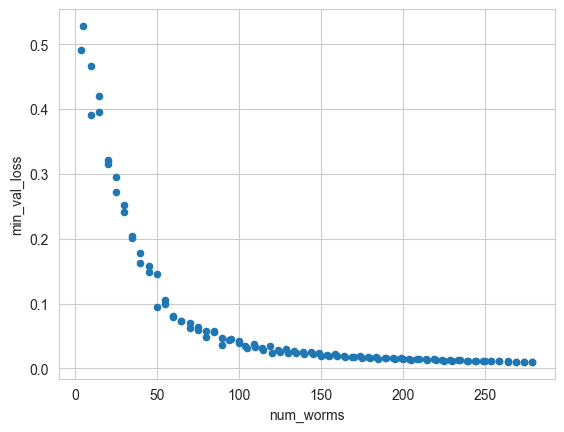

In [29]:
f1 = scaling_slope_results[scaling_slope_results["model"] == "NetworkLSTM"]
f2 = f1[f1["validation_dataset"] == "Kato2015"]
f2.plot.scatter(x="num_worms", y="min_val_loss")

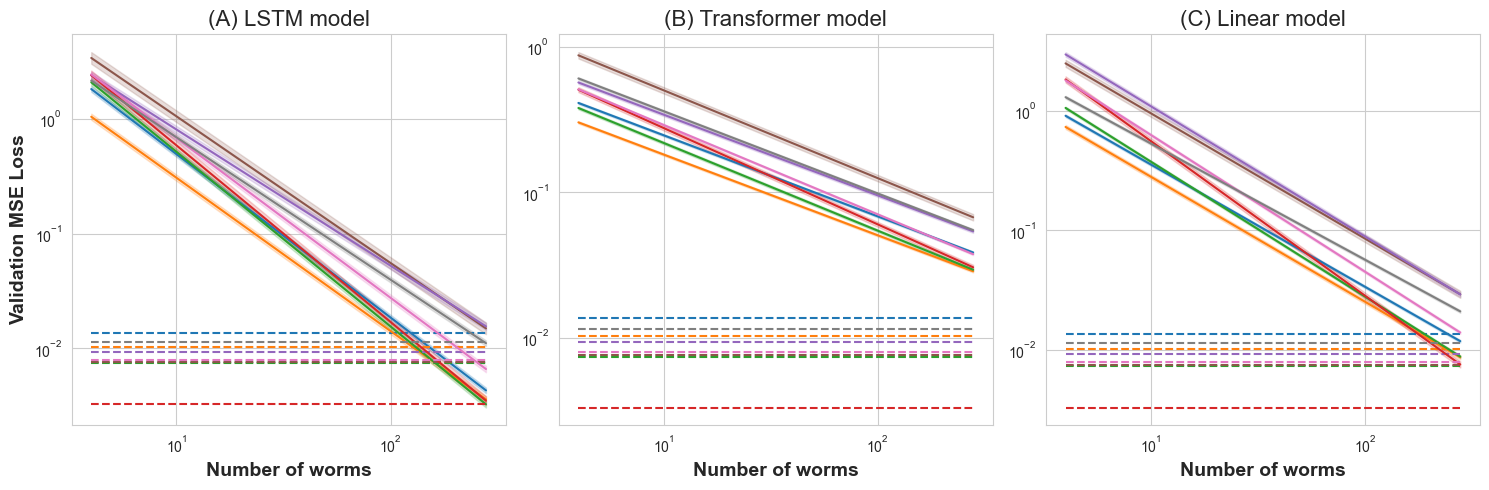

In [127]:
scaling_slopes_plot(scaling_slope_results, legend_code=leg_code)

## Synthetic

In [5]:
nts_experiments = {
    "LSTM": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_0/2023_11_22_03_55_43",  # LSTM trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_1/2023_11_22_04_56_52",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_2/2023_11_22_05_45_36",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_3/2023_11_22_06_11_13",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_4/2023_11_22_13_03_12",
    ],
    "Transformer": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_0/2023_11_22_03_56_16",  # Transformer trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_1/2023_11_22_04_57_22",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_2/2023_11_22_05_45_53",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_3/2023_11_22_06_11_39",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_4/2023_11_22_13_05_02",
    ],
    "Linear": [
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_0/2023_11_22_03_54_28",  # Linear trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_1/2023_11_22_04_56_14",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_2/2023_11_22_05_45_19",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_3/2023_11_22_06_10_49",
        "/home/lrvnc/Projects/worm-graph/logs/results/num_time_steps/synthetic/seed_4/2023_11_22_13_02_57",
    ],
}

scaling_slope_results = scaling_slopes_df(nts_experiments)  # Took ~10s
scaling_slope_results

,expID,model,validation_dataset,individual_validation_loss,individual_baseline_loss,num_time_steps,num_worms,min_val_loss,val_baseline
0,exp0,NetworkLSTM,Sines0000,0.768344,0.162604,8994,6,0.753347,0.162384
1,exp0,NetworkLSTM,Lorenz0000,0.886968,0.198092,8994,6,0.753347,0.162384
2,exp0,NetworkLSTM,WhiteNoise0000,1.467481,1.935921,8994,6,0.753347,0.162384
3,exp0,NetworkLSTM,RandWalk0000,0.749491,0.003667,8994,6,0.753347,0.162384
4,exp0,NetworkLSTM,VanDerPol0000,0.772855,0.016906,8994,6,0.753347,0.162384
...,...,...,...,...,...,...,...,...,...
1360,exp9,LinearNN,Sines0000,0.759368,0.157366,59960,40,0.443155,0.016903
1361,exp9,LinearNN,Lorenz0000,0.799632,0.197043,59960,40,0.443155,0.016903
1362,exp9,LinearNN,WhiteNoise0000,1.390958,1.944156,59960,40,0.443155,0.016903
1363,exp9,LinearNN,RandWalk0000,0.711356,0.003798,59960,40,0.443155,0.016903


<Axes: xlabel='num_worms', ylabel='min_val_loss'>

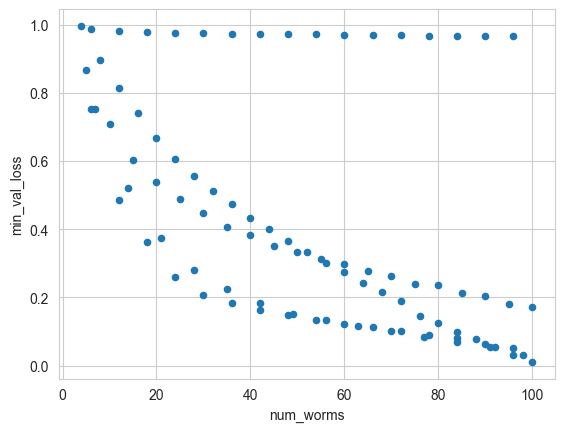

In [27]:
f1 = scaling_slope_results[scaling_slope_results["model"] == "NetworkLSTM"]
f2 = f1[f1["validation_dataset"] == "Sines0000"]
f2.plot.scatter(x="num_worms", y="min_val_loss")

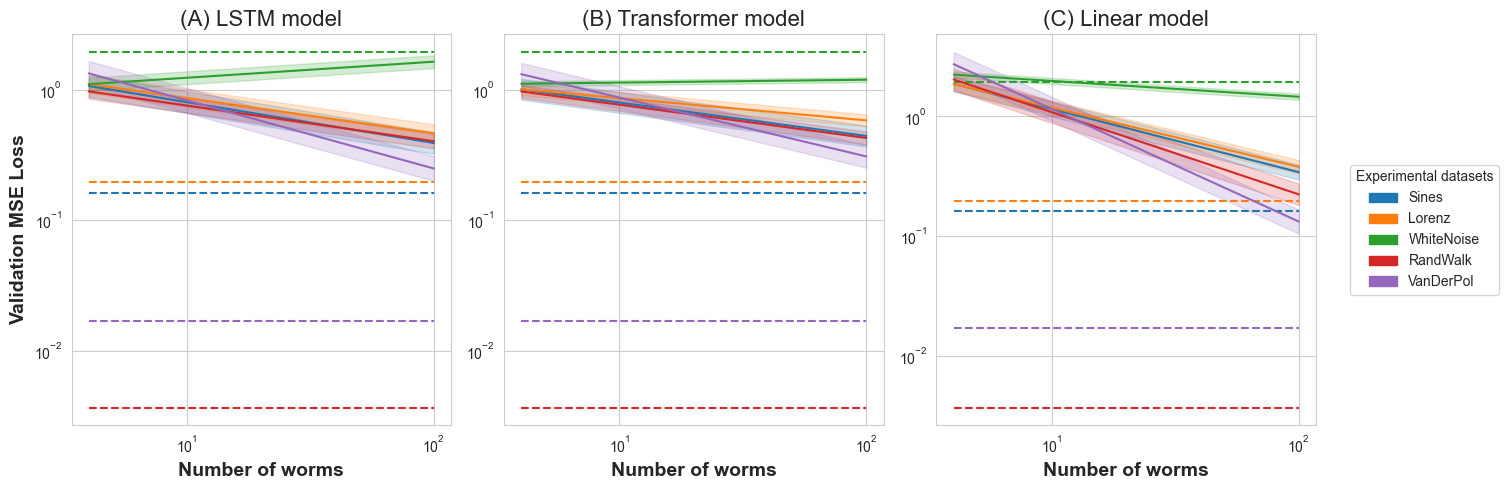

In [8]:
scaling_slopes_plot(scaling_slope_results, legend_code=leg_code)

# Cross-dataset Generalization

*This function automatically loads the results from the indicated experiments and displays a heatmap plot showing the validation loss on individual experimental datasets after a model has been trained (from scratch) using a single experimental dataset.*

*You need to specify the model names respective to each experiment and also the legend color code.*

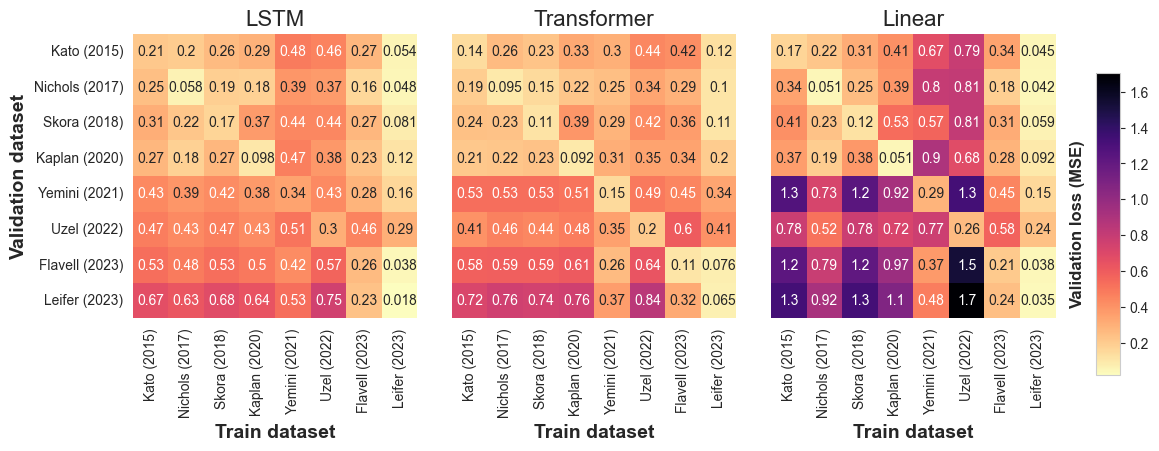

In [6]:
cds_experiments = {
    "LSTM": [
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/experimental/seed_0/2023_11_22_14_37_46",  # LSTM trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/experimental/seed_1/2023_11_22_15_26_19",
    ],
    "Transformer": [
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/experimental/seed_0/2023_11_22_14_38_48",  # Transformer trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/experimental/seed_1/2023_11_22_15_27_07",
    ],
    "Linear": [
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/experimental/seed_0/2023_11_22_14_56_24",  # Linear trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/experimental/seed_1/2023_11_22_15_24_48",
    ],
}

cds_results = cross_dataset_df(cds_experiments)
cross_dataset_plot(cds_results_df=cds_results, legend_code=legend_code)

## Synthetic

In [30]:
cds_experiments = {
    "LSTM": [
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_0/2023_11_22_16_34_27",  # LSTM trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_1/2023_11_22_17_28_39",
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_2/2023_11_22_17_14_58",
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_3/2023_11_22_17_53_49",
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_4/2023_11_22_17_58_14",
    ],
    "Transformer": [
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_0/2023_11_22_16_34_46",  # Transformer trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_1/2023_11_22_17_29_00",
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_2/2023_11_22_17_15_22",
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_3/2023_11_22_17_54_05",
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_4/2023_11_22_17_58_33",
    ],
    "Linear": [
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_0/2023_11_22_16_20_38",  # Linear trial 1
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_1/2023_11_22_17_28_22",
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_2/2023_11_22_17_14_32",
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_3/2023_11_22_17_53_34",
        "/home/lrvnc/Projects/worm-graph/logs/results/cross_dataset/synthetic/seed_4/2023_11_22_17_57_57",
    ],
}

cds_results = cross_dataset_df(cds_experiments)

In [31]:
df_model_subset = cds_results[cds_results["model"] == "LSTM"]

# df_model_subset[(df_model_subset["train_dataset"] == 'Sines0000') & (df_model_subset["val_dataset"] == 'VanDerPol0000')]
df_model_subset

,exp,model,train_dataset,val_dataset,validation_loss,validation_baseline,num_worms
0,exp0,LSTM,Sines0000,Sines0000,0.040737,0.162657,101.0
1,exp0,LSTM,Sines0000,Lorenz0000,0.642462,0.198297,101.0
2,exp0,LSTM,Sines0000,WhiteNoise0000,1.615554,1.930848,101.0
3,exp0,LSTM,Sines0000,RandWalk0000,0.601600,0.003697,101.0
4,exp0,LSTM,Sines0000,VanDerPol0000,0.580342,0.016907,101.0
...,...,...,...,...,...,...,...
0,exp4,LSTM,VanDerPol0000,Sines0000,0.665094,0.162657,101.0
1,exp4,LSTM,VanDerPol0000,Lorenz0000,0.711546,0.198297,101.0
2,exp4,LSTM,VanDerPol0000,WhiteNoise0000,1.218304,1.930848,101.0
3,exp4,LSTM,VanDerPol0000,RandWalk0000,0.535628,0.003697,101.0


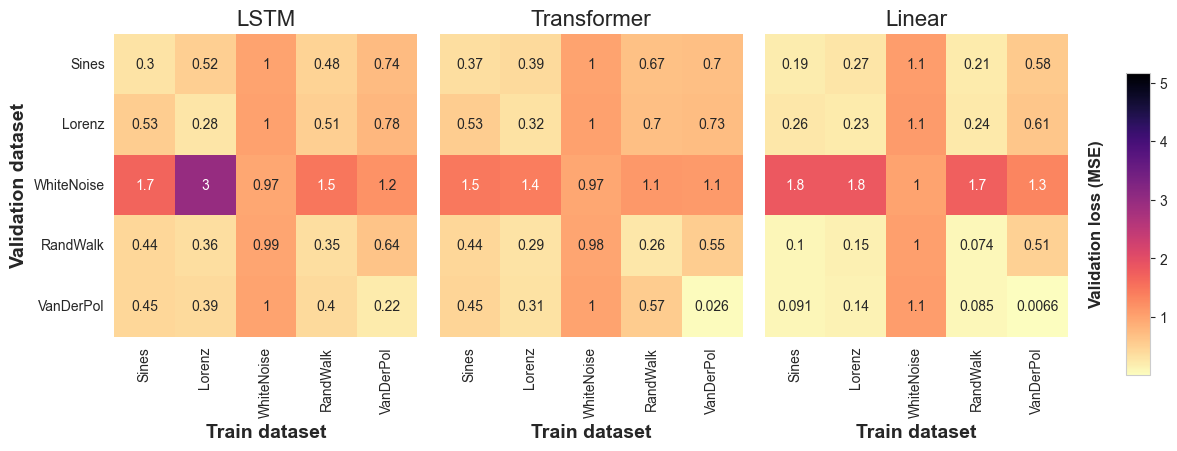

In [32]:
cross_dataset_plot(cds_results_df=cds_results, legend_code=legend_code)

# Predictions

*Load and plot the predictions for the same neuron across different datasets. You need to determine which neurons are common to all datasets (I did it manually).*

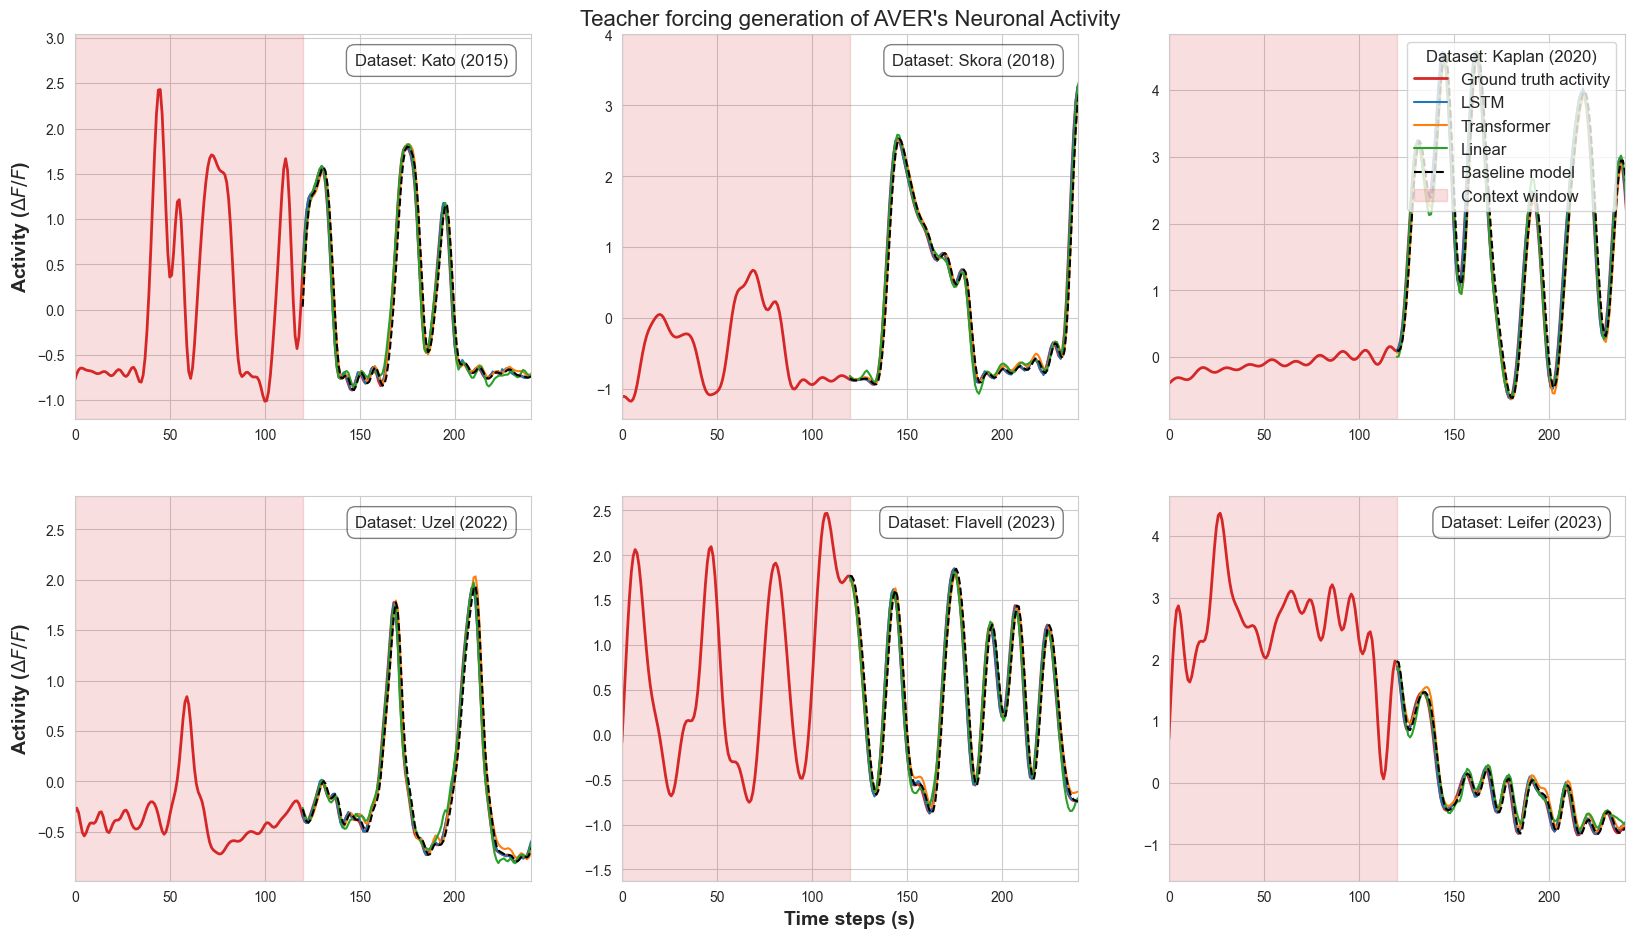

In [18]:
experiment_log_folders = [
    os.path.join("results", "NTS_LSTM_2"),  # LSTM trial 1
    os.path.join("results", "NTS_TRANSFORMER_2"),  # Transformer trial 1
    os.path.join("results", "NTS_LINEAR_2"),  # Linear trial 1
]

model_names = ["LSTM", "Transformer", "Linear"]

ds_type = "val"  # we are plotting the predictions using the validation dataset (data never seen during training, second split)
exp = "exp5"  # model trained with maximum amount of data (best model to use for predictions)
neuron_to_plot = "AVER"  # neuron we want to plot

teacher_forcing(
    experiment_log_folders=experiment_log_folders,
    model_names=model_names,
    legend_code=leg_code,
    ds_type=ds_type,
    exp=exp,
    neuron_to_plot=neuron_to_plot,
)

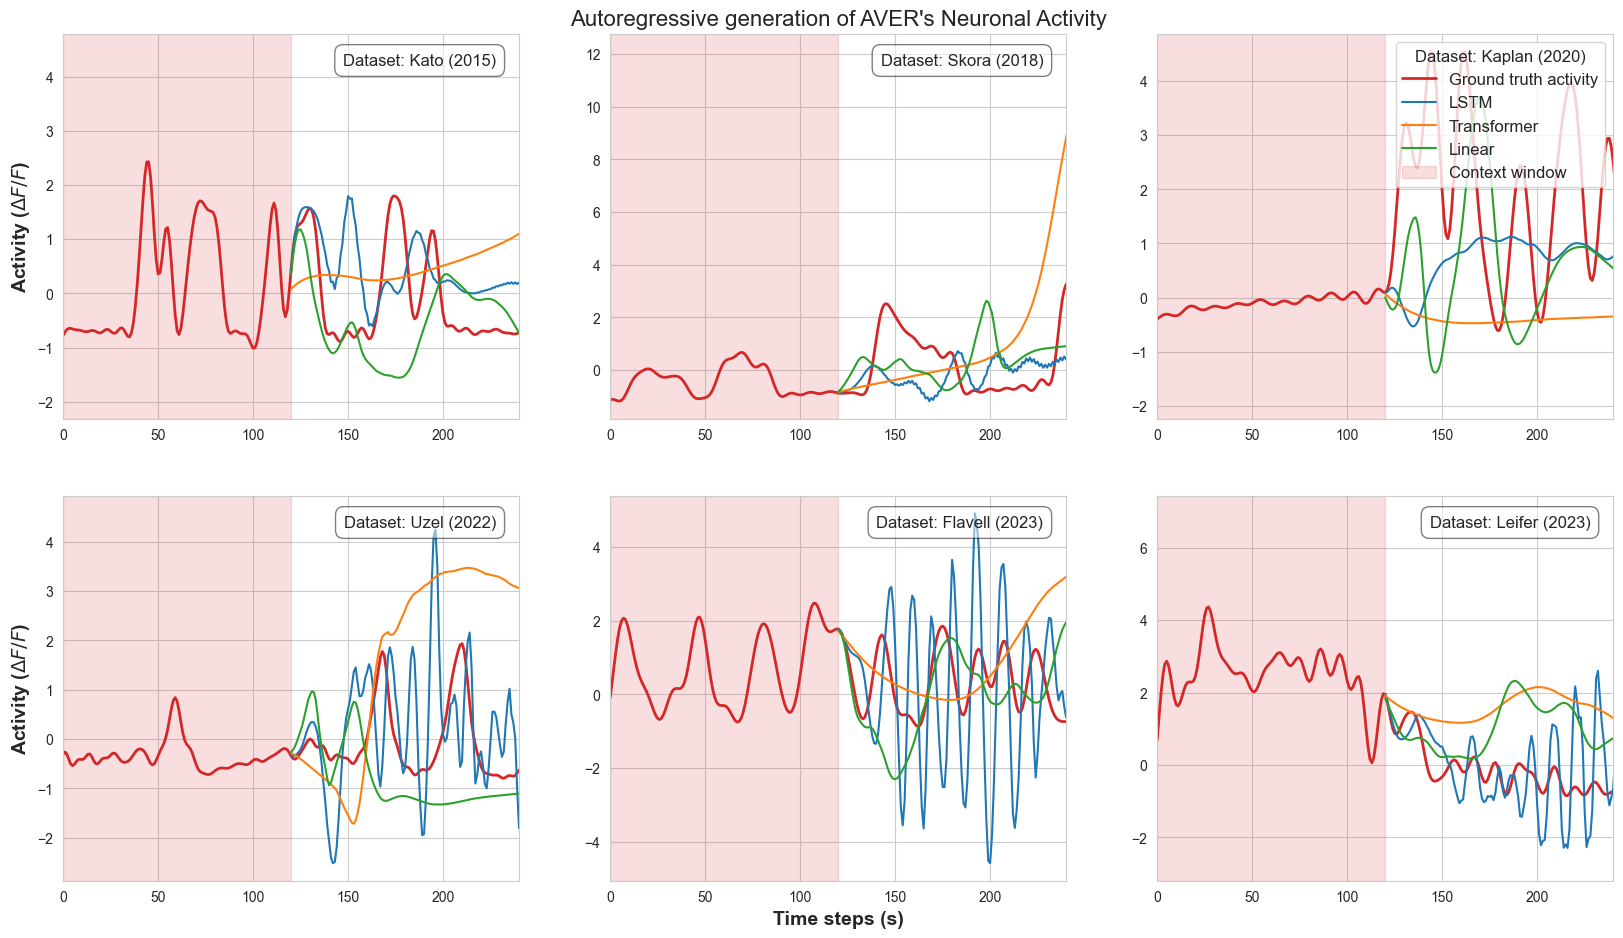

In [19]:
autoregressive(
    experiment_log_folders=experiment_log_folders,
    model_names=model_names,
    legend_code=leg_code,
    ds_type=ds_type,
    exp=exp,
    neuron_to_plot=neuron_to_plot,
)

# (Sup. fig) Prediction gap

*Loads the relevant results and plots the refinement of the prediction plot as the amount of training data for the LSTM model increases.*

/home/lrvnc/Projects/worm-graph/analysis/iclr2024/tools.py:982: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


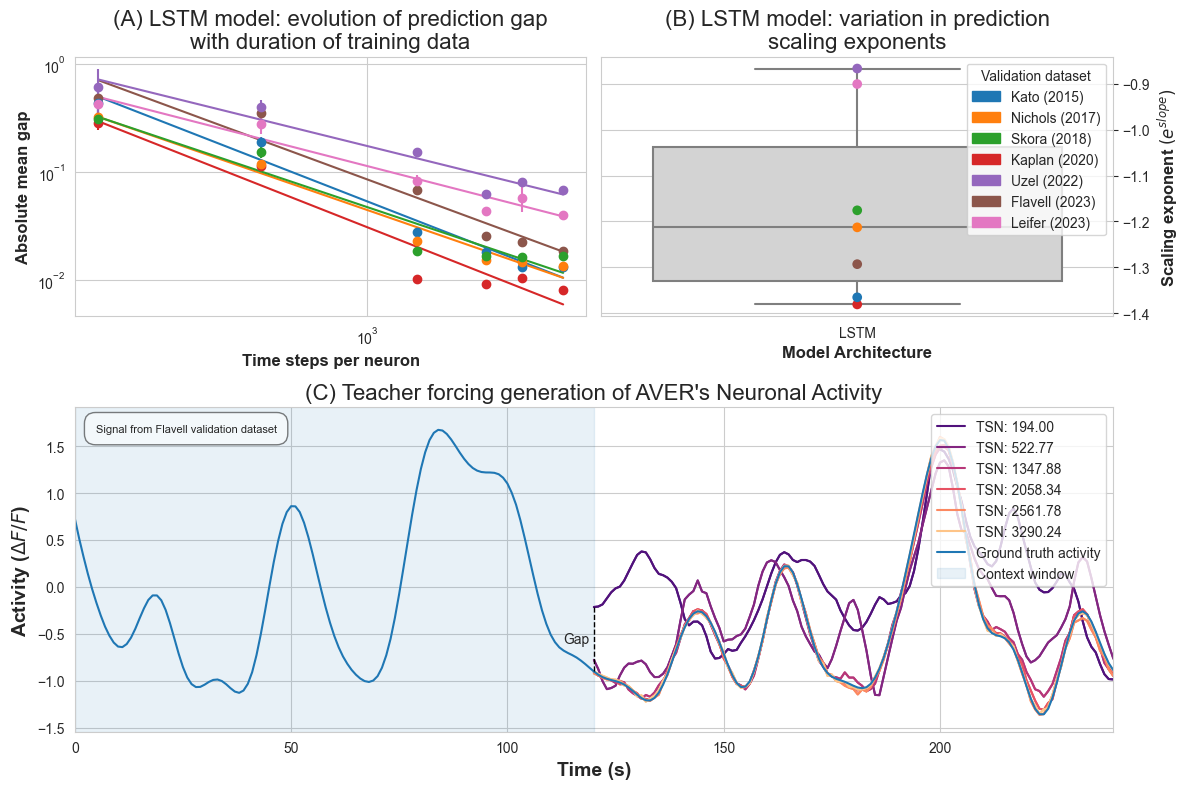

In [20]:
pred_gap_df = prediction_gap(
    exp_nts_log_dir=os.path.join("results", "NTS_LSTM_1"),
    legend_code=leg_code,
    neuronID="AVER",
    wormID="worm1",
    datasetID="Flavell2023",
)